In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import gc
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import folium

In [3]:
try:del crime # Being nice to memory space
except:pass;gc.collect()

In [4]:
crime = pd.read_csv("./crime_cleaned.csv")

In [5]:
crime.head()

,Unnamed: 0,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Report Date Time,Location Type,Address,Zip Code,Council District,APD Sector,Clearance Status,X-coordinate,Y-coordinate,Latitude,Longitude
0,0,DISTURBANCE - OTHER,3401,N,2019-09-21 21:13:00,2019-09-21 21:13:00,RESIDENCE / HOME,2205 WIRTZ AVE,78704,9,DA,O,3107244.0,3107244.0,30.246032,-97.765791
1,1,HARASSMENT,2703,N,2019-09-21 19:39:00,2019-09-21 19:39:00,RESIDENCE / HOME,9809 HANSFORD DR,78753,4,ED,U,3133312.0,3133312.0,30.360981,-97.680054
2,2,FAMILY DISTURBANCE,3400,N,2019-09-21 19:13:00,2019-09-21 19:13:00,RESIDENCE / HOME,2717 S LAMAR BLVD,78704,5,DA,U,3102594.0,3102594.0,30.243394,-97.780591
3,3,HARASSMENT,2703,N,2019-09-21 18:57:00,2019-09-21 20:17:00,RESIDENCE / HOME,5921 RED BUD RIDGE LN,78744,2,FR,U,3116190.0,3116190.0,30.189894,-97.738960
4,4,DISTURBANCE - OTHER,3401,N,2019-09-21 18:00:00,2019-09-21 18:20:00,UNKNOWN,500 NECHES ST,78701,9,GE,U,3115647.0,3115647.0,30.265956,-97.738637


In [6]:
crime.describe()

,Unnamed: 0,Highest Offense Code,Zip Code,Council District,X-coordinate,Y-coordinate,Latitude,Longitude
count,108362.000000,108362.000000,108362.000000,108362.000000,1.075430e+05,1.075430e+05,106116.000000,106116.000000
mean,54180.500000,1649.436491,77940.548606,5.004974,3.077519e+06,3.077519e+06,30.293406,-97.729298
std,31281.559272,1170.796260,7856.656452,2.858794,4.534777e+05,4.534777e+05,0.241132,0.736478
min,0.000000,100.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000120,-97.995789
25%,27090.250000,601.000000,78717.000000,3.000000,3.107725e+06,3.107725e+06,30.232820,-97.762272
50%,54180.500000,1108.000000,78741.000000,4.000000,3.116891e+06,3.116891e+06,30.280295,-97.733497
75%,81270.750000,2704.000000,78752.000000,7.000000,3.126671e+06,3.126671e+06,30.357409,-97.702053
max,108361.000000,8503.000000,78759.000000,10.000000,3.889524e+07,3.889524e+07,30.558996,-0.000134


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108362 entries, 0 to 108361
Data columns (total 16 columns):
Unnamed: 0                     108362 non-null int64
Highest Offense Description    108362 non-null object
Highest Offense Code           108362 non-null int64
Family Violence                108362 non-null object
Occurred Date Time             108362 non-null object
Report Date Time               108362 non-null object
Location Type                  108362 non-null object
Address                        108362 non-null object
Zip Code                       108362 non-null int64
Council District               108362 non-null int64
APD Sector                     108362 non-null object
Clearance Status               108362 non-null object
X-coordinate                   107543 non-null float64
Y-coordinate                   107543 non-null float64
Latitude                       106116 non-null float64
Longitude                      106116 non-null float64
dtypes: float64(4), int64

In [8]:
crime.drop(["Unnamed: 0"],axis=1,inplace=True)

In [9]:
crime["Occurred Date Time"] = pd.to_datetime(crime["Occurred Date Time"])
crime["Report Date Time"] = pd.to_datetime(crime["Report Date Time"])

In [10]:
crime["Location Type"].value_counts().head(10)

RESIDENCE / HOME                42186
STREETS / HWY / ROAD / ALLEY    20285
PARKING LOTS / GARAGE           13597
OTHER / UNKNOWN                  6783
COMMERCIAL / OFFICE BUILDING     2938
DEPARTMENT / DISCOUNT STORE      2747
HOTEL / MOTEL / ETC.             2446
RESTAURANTS                      2362
GROCERY / SUPERMARKET            1931
CONVENIENCE STORE                1530
Name: Location Type, dtype: int64

In [11]:
crime["Clearance Status"] = crime["Clearance Status"].astype("category")

In [12]:
crime["Highest Offense Description"] = crime["Highest Offense Description"].astype("category")

In [13]:
crime["Family Violence"] = crime["Family Violence"].astype("category")

In [14]:
crime["crime_day"] = crime["Occurred Date Time"].dt.day_name()

KeyboardInterrupt: 

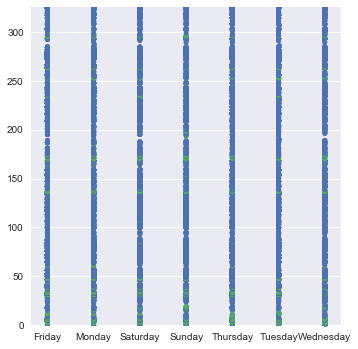

In [16]:
sns.catplot(x="crime_day", y="Highest Offense Description", hue="Family Violence", kind="swarm", data=crime)

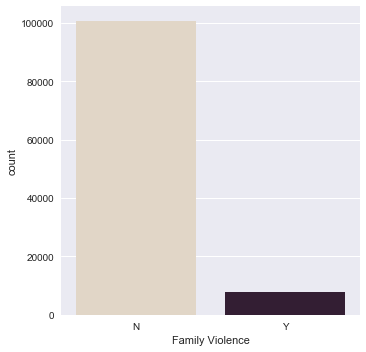

In [17]:
#most of the crimes are not Family Violence
sns.catplot(x="Family Violence", kind="count", palette="ch:.25", data=crime)

In [ ]:
#C=Cleared by Arrest O=Cleared by Exception N=Not cleared u =Unknown
# As the plot says, most of the cases are not cleared yet.
sns.catplot(x="Clearance Status", kind="count", palette="ch:.30", data=crime)

In [ ]:

# maximum crimes occur in district 9
sns.catplot(x="Council District", kind="count", palette="ch:.50", data=crime)

In [20]:
crime = crime.set_index("Occurred Date Time")

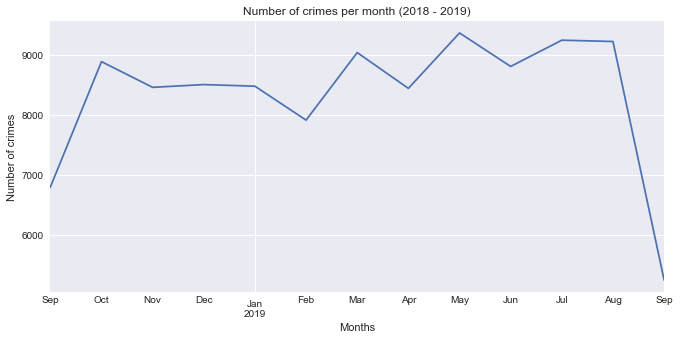

In [21]:
plt.figure(figsize=(11,5))
crime.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2018 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

In [ ]:
crime["Highest Offense Description"] = crime["Highest Offense Description"].astype("object")

In [ ]:
loc_to_change  = list(crime['Location Type'].value_counts()[20:].index)
desc_to_change = list(crime['Highest Offense Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crime.loc[crime['Location Type'].isin(loc_to_change) , crime.columns=='Location Type'] = 'OTHER'
crime.loc[crime['Highest Offense Description'].isin(desc_to_change) , crime.columns=='Highest Offense Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [ ]:
crime["Highest Offense Description"].value_counts()

In [ ]:
crimes_count_date = crime.pivot_table( "Highest Offense Code",aggfunc=np.size, columns='Highest Offense Description', index=crime.index.date,fill_value=0)

In [ ]:
crimes_count_date_2019 = crimes_count_date[crimes_count_date.index.year == 2019]

In [ ]:
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

In [ ]:
# Crimes from Sept 2018 - Sept 2019
plo = crimes_count_date.resample('M').sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
# Analysing crimes by month for 2019
plo1 = crimes_count_date_2019.resample('M').sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
# crimes by day of week

crime.groupby(["crime_day"]).size().plot(kind="barh")
plt.ylabel('Days of the week')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [ ]:
crime.groupby([crime.index.month]).size().plot(kind="barh")
plt.ylabel('Months')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [ ]:
#Crime locations
plt.figure(figsize=(8,10))
crime.groupby(["Location Type"]).size().sort_values(ascending= True).plot(kind="barh")
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [ ]:
crime.index.names

In [ ]:
crime.info()

In [23]:
crime['ID'] = np.arange(len(crime))

In [ ]:
crime.head()

In [ ]:
hour_by_location = crime.pivot_table(values="ID",index="Location Type",columns=crime.index.hour ,aggfunc=np.size).fillna(0)

In [ ]:
hour_by_crimetype = crime.pivot_table(values="ID",index="Highest Offense Description",columns=crime.index.hour ,aggfunc=np.size).fillna(0)

In [24]:
hour_by_week = crime.pivot_table(values="ID",index="crime_day",columns=crime.index.hour ,aggfunc=np.size).fillna(0)

In [ ]:
location_by_type = crime.pivot_table(values='ID', index='Location Type', columns='Highest Offense Description', aggfunc=np.size).fillna(0)

In [25]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result 

In [ ]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_crimetype)

In [ ]:
hour_by_crimetype.head()

In [ ]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_location)

C:\Users\plahoti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


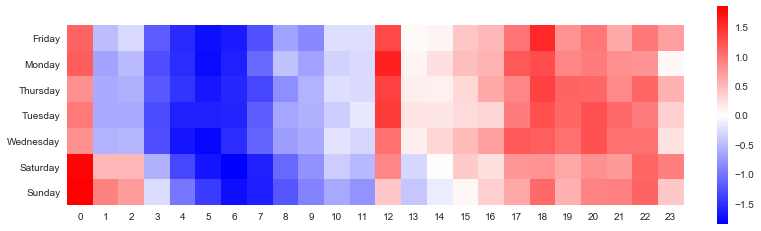

In [26]:
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week)